#### Importing Libraries

In [131]:
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd
import xlrd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
emp=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
#display the basic information of the dataframe
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [4]:
#drop the EmpNumber from the data as it will not give us any insight and wont help our algorithms
emp=emp.drop('EmpNumber',axis=1)

In [5]:
emp.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [6]:
#checking for any missing values in the data
emp.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
#making a copy of the dataframe as backup
emp1=emp.copy()

In [8]:
#making a list of character datatype columns
cat_cols=emp.select_dtypes(include=['object']).columns.tolist()

In [9]:
cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [10]:
num_cols=emp1.drop(cat_cols,axis=1).columns.tolist()

In [11]:
num_cols

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [12]:
num_cols.remove('PerformanceRating')

In [13]:
emp.shape

(1200, 27)




## Visualizing the features in the dataframe

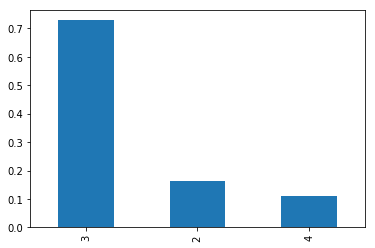

In [14]:
#exploring the target column
#normalizing the no.of employees for each rating in percentages with the help of normalize option
emp.PerformanceRating.value_counts(normalize=True).plot(kind='bar')

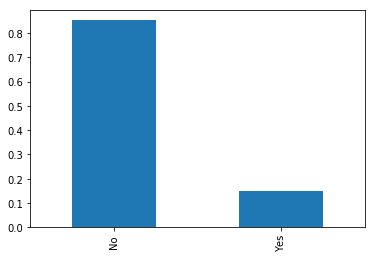

In [15]:
#plotting attrition 
emp.Attrition.value_counts(normalize=True).plot(kind='bar')

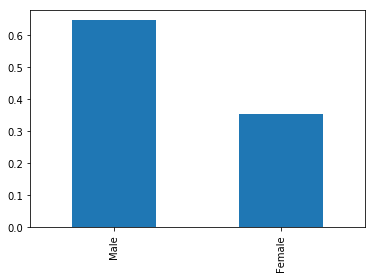

In [16]:
#plotting gender-wise attrition
emp.Gender[(emp.Attrition=='Yes')].value_counts(normalize=True).plot(kind='bar')

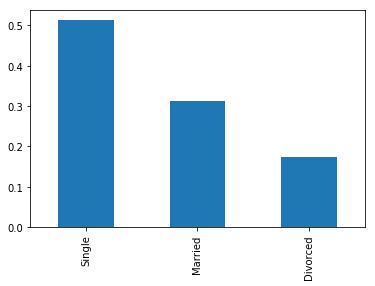

In [17]:
#plotting attrition among male employees based on their marital status
emp.MaritalStatus[(emp.Attrition=='Yes') & (emp.Gender=='Male')].value_counts(normalize=True).plot(kind='bar')

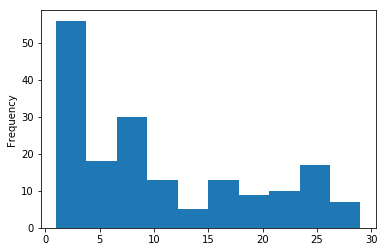

In [18]:
#visualizing attrition based on distance from home
emp.DistanceFromHome[(emp.Attrition=='Yes')].plot(kind='hist')





### Department Wise Analysis

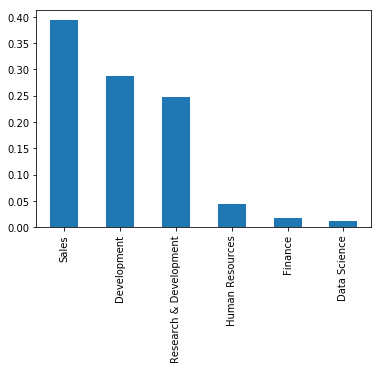

In [19]:
# Department wise analysis of attrition in percentages
emp.EmpDepartment[emp.Attrition=="Yes"].value_counts(normalize=True).plot(kind='bar')

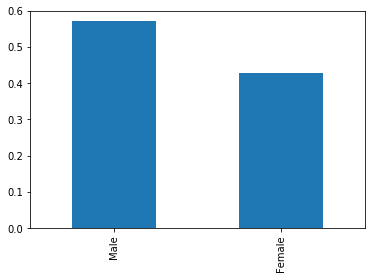

In [40]:
#plotting attrition for Sales department gender wise
emp.Gender[(emp.Attrition=='Yes') & (emp.EmpDepartment=='Sales')].value_counts(normalize=True).plot(kind='bar')

In [20]:
#replacing OverTime values to 1 and 0 for Yes and No respectively. This is done so that we can plot OverTime
emp['OverTime1']=emp.OverTime.replace({'Yes':1,'No':0})

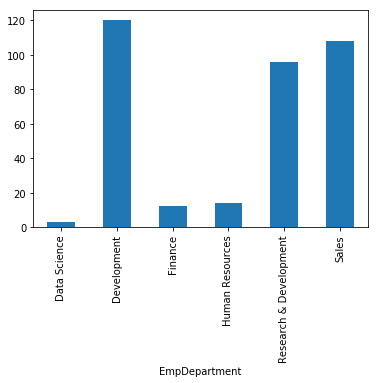

In [35]:
#visualizing department wise OverTime
emp[emp.OverTime1==1].groupby('EmpDepartment')['OverTime1'].count().plot(kind='bar')

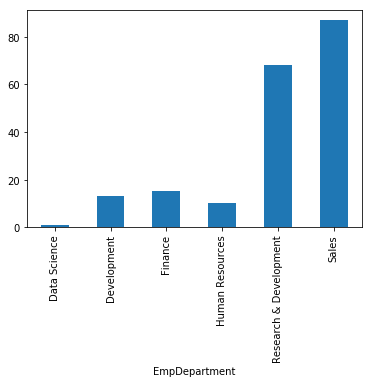

In [41]:
#plotting department wise lowest performing employee counts
emp[emp.PerformanceRating==2].groupby('EmpDepartment')['PerformanceRating'].count().plot(kind='bar')

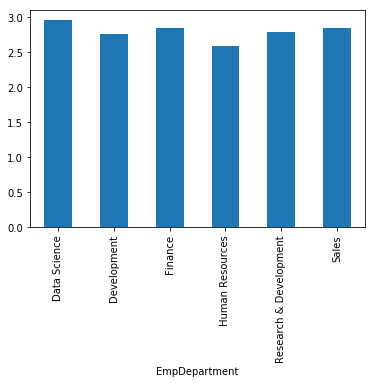

In [42]:
#plotting department wise training times
emp.groupby('EmpDepartment')['TrainingTimesLastYear'].mean().plot(kind='bar')


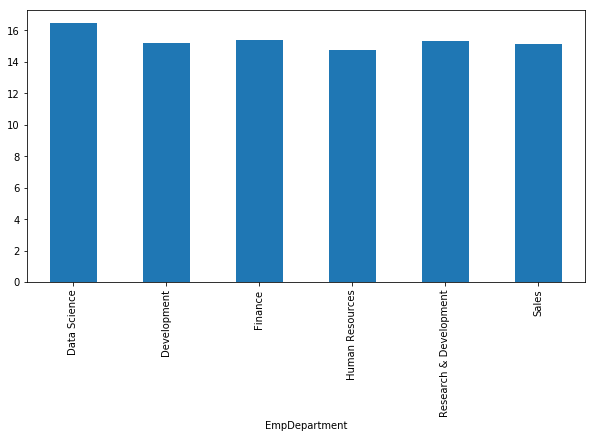

In [86]:
#checking the average EmpLastSalaryHikePercent department wise
emp.groupby('EmpDepartment')['EmpLastSalaryHikePercent'].mean().plot(kind='bar',figsize=(10,5))

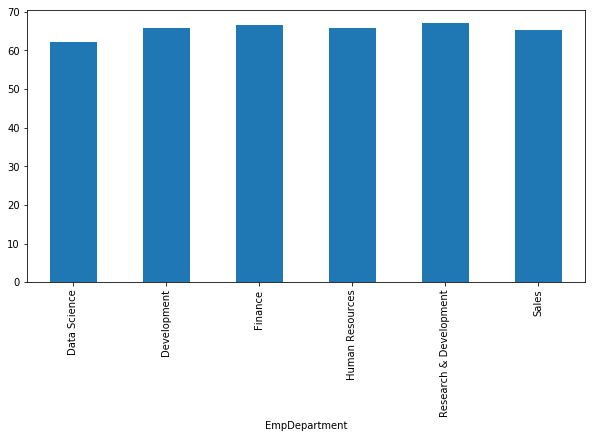

In [39]:
#checking the average EmpHourlyRate department wise
emp.groupby('EmpDepartment')['EmpHourlyRate'].mean().plot(kind='bar',figsize=(10,5))

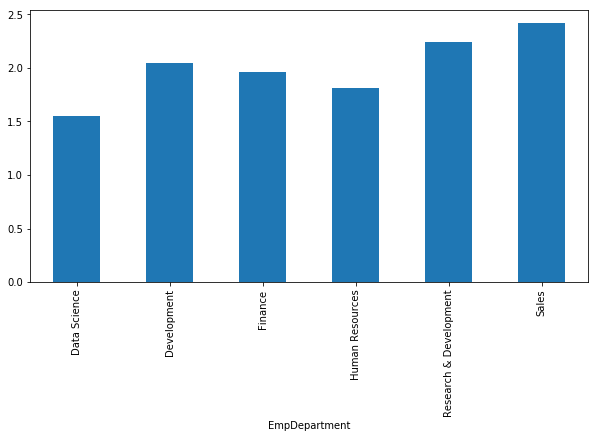

In [38]:
#checking the average YearsSinceLastPromotion department wise
emp.groupby('EmpDepartment')['YearsSinceLastPromotion'].mean().plot(kind='bar',figsize=(10,5))


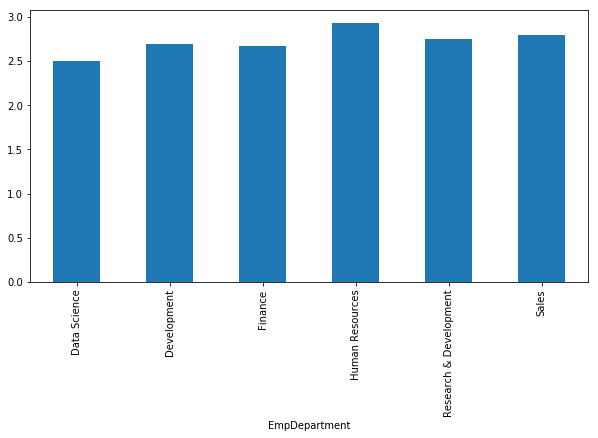

In [37]:
#checking the average EmpWorkLifeBalance department wise
emp.groupby('EmpDepartment')['EmpWorkLifeBalance'].mean().plot(kind='bar',figsize=(10,5))


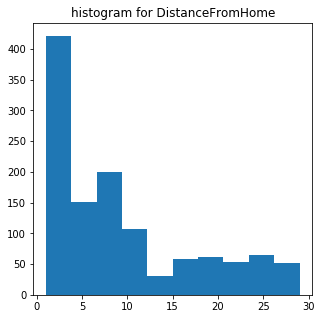

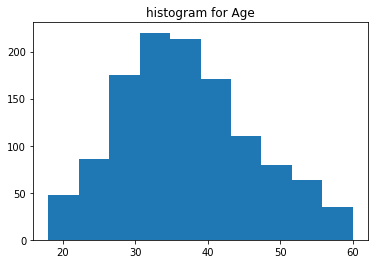

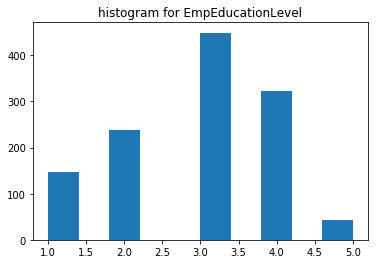

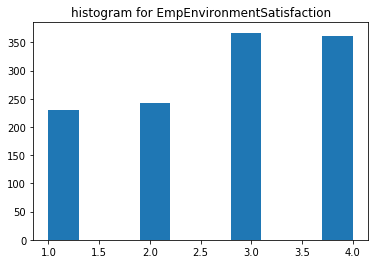

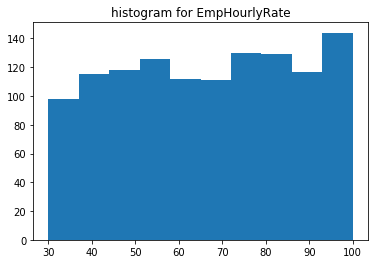

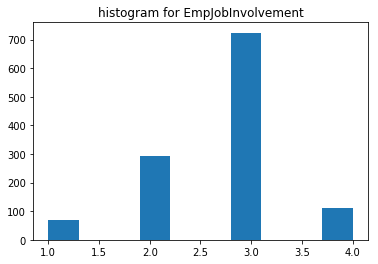

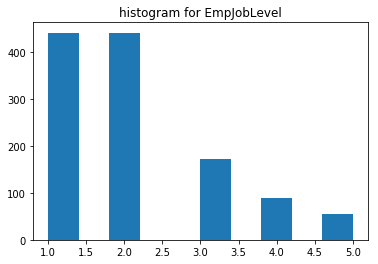

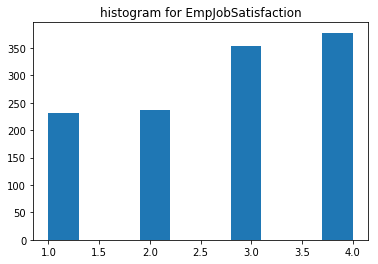

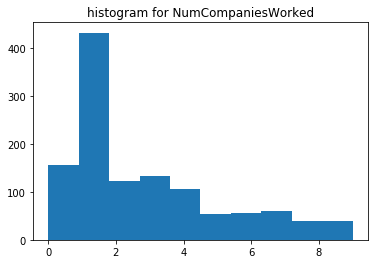

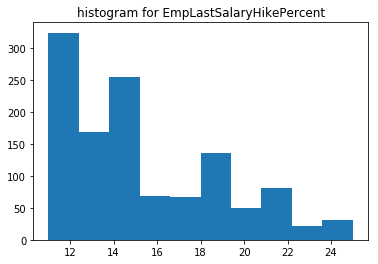

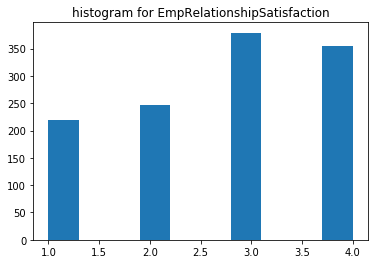

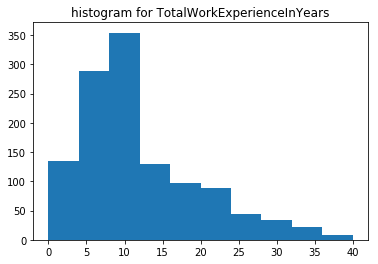

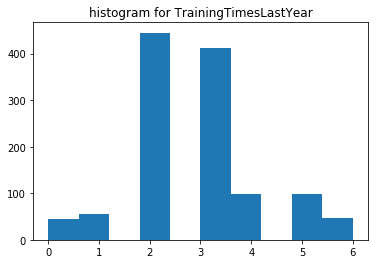

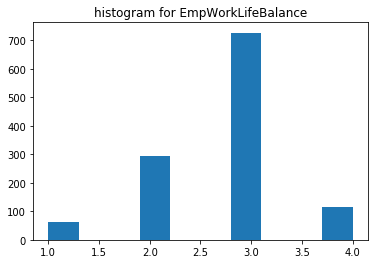

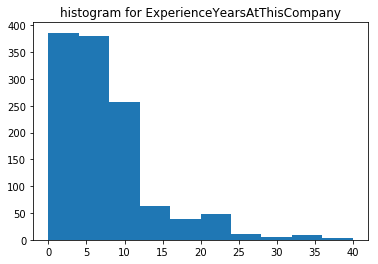

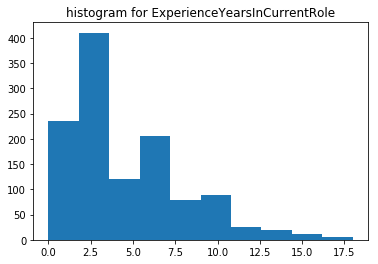

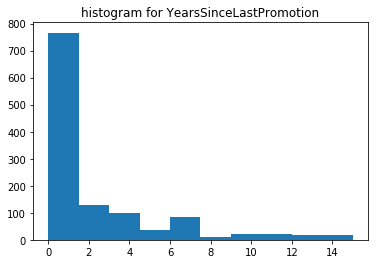

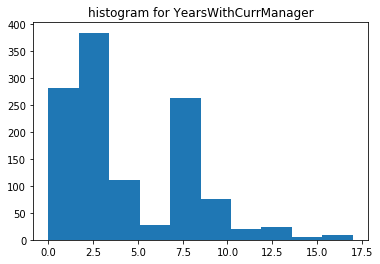

In [29]:
plt.figure(figsize=(5,5))
for i,col in enumerate(num_cols):
    plt.figure(i)
    plt.title("histogram for %s"%col)
    plt.hist(emp[col])

In [43]:
emp.shape

(1200, 28)

In [44]:
#since we have visualized the features, we can drop OverTime1 which we created before. 
emp.drop('OverTime1',1,inplace=True)

In [45]:
emp.shape

(1200, 27)

In [46]:
cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [47]:
emp=pd.get_dummies(emp,columns=cat_cols)

In [74]:
emp.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,2,12,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,5,21,...,0,0,0,0,1,0,0,1,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,1,1,0,1,0
4,60,16,4,1,84,3,2,1,8,14,...,0,0,0,0,0,1,1,0,1,0


In [53]:
emp_before_scale=emp.copy()

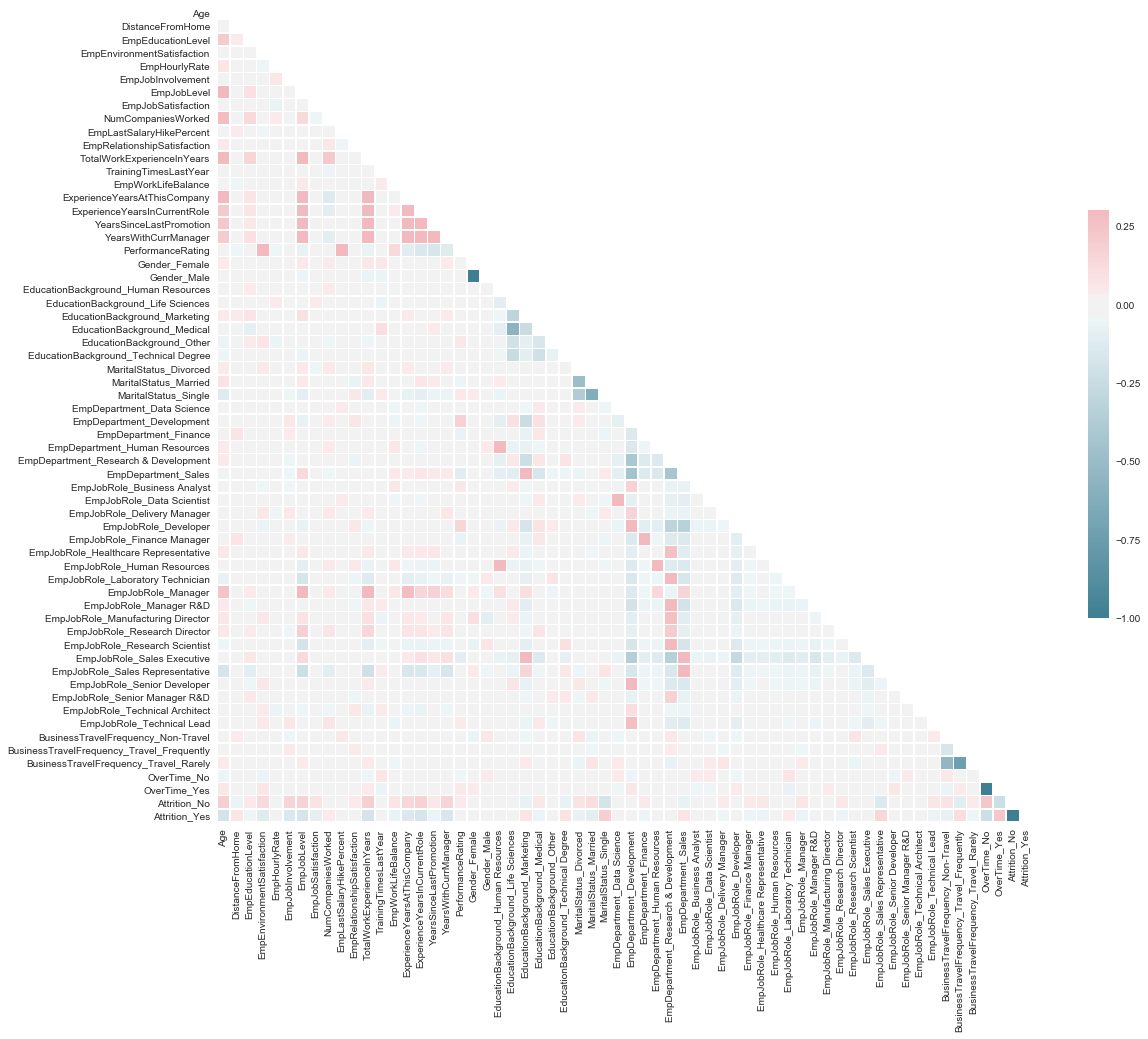

In [70]:
sb.set(style="white")

# Compute the correlation matrix
corr = emp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
emp.shape

(1200, 62)

In [76]:
#create dependent and independent sets 
x=emp.drop('PerformanceRating',axis=1)
y=emp.PerformanceRating

In [77]:
x.shape

(1200, 61)

In [78]:
y.shape

(1200,)

In [175]:
#split the data into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [176]:
x_train.shape

(960, 61)

In [177]:
x_test.shape

(240, 61)

In [178]:
y_train.shape

(960,)

In [179]:
y_test.shape

(240,)

In [181]:
#normalize the training data to bring the features on the same scale
scaler=StandardScaler()
x_train_scale=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)

In [182]:
x_train_scale.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0.345457,-0.992304,1.060409,-0.658398,1.079502,0.365988,-0.978537,-0.662510,0.148194,1.863200,...,-0.102598,-0.072357,-0.170114,-0.359738,-0.483666,0.661155,0.628768,-0.628768,0.411468,-0.411468
1,-1.309425,-0.745737,0.103649,-1.574430,1.226332,0.365988,-0.978537,-1.575005,0.961142,-0.613423,...,-0.102598,-0.072357,-0.170114,-0.359738,-0.483666,0.661155,0.628768,-0.628768,-2.430324,2.430324
2,-1.419751,-0.252603,0.103649,-1.574430,-0.535621,0.365988,-0.978537,0.249986,-0.664754,0.212118,...,-0.102598,-0.072357,-0.170114,-0.359738,2.067541,-1.512505,-1.590412,1.590412,-2.430324,2.430324
3,-0.647472,0.363815,0.103649,1.173666,-1.220825,0.365988,-0.068270,1.162481,-1.071228,-1.163783,...,-0.102598,-0.072357,-0.170114,-0.359738,-0.483666,0.661155,-1.590412,1.590412,0.411468,-0.411468
4,0.897084,2.459636,0.103649,0.257634,0.834786,0.365988,-0.978537,1.162481,0.961142,-0.613423,...,-0.102598,-0.072357,5.878397,-0.359738,-0.483666,0.661155,0.628768,-0.628768,0.411468,-0.411468










#### Define a function to fit different algorithms

In [183]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = model.score(x_train, y_train)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = metrics.accuracy_score(y_train, train_pred) 
    
    return train_pred, acc, acc_cv



#### Logistic Regression

In [184]:
#we are using 10-fold cross validation in Logistic Regression
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),x_train,y_train,10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 0.829166666667
Accuracy CV 10-Fold: 0.786458333333





#### K Nearest Neighbours

In [185]:
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),x_train,y_train,10)
print("Accuracy : %s"%acc_knn)
print("Accuracy CV 10-Fold: %s"%acc_cv_knn)

Accuracy : 0.761458333333
Accuracy CV 10-Fold: 0.701041666667





#### Naive Bayes

In [186]:
train_pred_nb,acc_nb,acc_cv_nb=fit_ml_algo(GaussianNB(),x_train,y_train,10)
print("Accuracy : %s"%acc_nb)
print("Accuracy CV 10-Fold : %s"%acc_cv_nb)


Accuracy : 0.259375
Accuracy CV 10-Fold : 0.226041666667


#### SVC

In [187]:
train_pred_svc,acc_svc,acc_cv_svc=fit_ml_algo(SVC(),x_train,y_train,10)
print("Accuracy : %s"%acc_svc)
print("Accuracy CV 10-Fold : %s"%acc_cv_svc)

Accuracy : 0.939583333333
Accuracy CV 10-Fold : 0.71875






#### Decision Tree Classifier

In [188]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 1.0
Accuracy CV 10-Fold: 0.888541666667






#### Gradient Boosting

In [189]:
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 0.991666666667
Accuracy CV 10-Fold: 0.921875





#### Random Forest

In [190]:
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(),x_train,y_train,10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)

Accuracy: 0.995833333333
Accuracy CV 10-Fold: 0.860416666667


## Model Results
Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual. We'll pay more attention to the cross-validation figure as Cross-validation is more robust than just the .fit() models. It does multiple passes over the data instead of one and select the test data from multiple chunks in the data.

In [201]:
models_regular_score=pd.DataFrame({ 'Model':['Logistic Regression','KNN','Naive Bayes','SVC','Decision Tree','Gradient Boosting','Random Forest'],
                      'Score':[acc_log,acc_knn,acc_nb,acc_svc,acc_dt,acc_gbt,acc_rf]
                    })
models_regular_score=models_regular_score.sort_values(by='Score',ascending=False)
models_regular_score['Score'] = models_regular_score['Score'].apply(lambda x: x*100,2)

In [202]:
models_regular_score

,Model,Score
4,Decision Tree,100.000000
6,Random Forest,99.583333
5,Gradient Boosting,99.166667
3,SVC,93.958333
0,Logistic Regression,82.916667
1,KNN,76.145833
2,Naive Bayes,25.937500


In [203]:
models_cv_score=pd.DataFrame({ 'Model':['Logistic Regression','KNN','Naive Bayes','SVC','Decision Tree','Gradient Boosting','Random Forest'],
                      'Score':[acc_cv_log,acc_cv_knn,acc_cv_nb,acc_cv_svc,acc_cv_dt,acc_cv_gbt,acc_cv_rf]
                    })
models_cv_score=models_cv_score.sort_values(by='Score',ascending=False)
models_cv_score['Score'] = models_cv_score['Score'].apply(lambda x: x*100,2)

In [204]:
models_cv_score

,Model,Score
5,Gradient Boosting,92.187500
4,Decision Tree,88.854167
6,Random Forest,86.041667
0,Logistic Regression,78.645833
3,SVC,71.875000
1,KNN,70.104167
2,Naive Bayes,22.604167
